<a href="https://colab.research.google.com/github/Eddy09246/Simple-Programming-Languages/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data


Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file



## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

## Read the .csv file, store it in a Pandas dataframe and Rename the columns

In [ ]:
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [ ]:
df.tail()

,DATE,TAG,POSTS
2714,2024-11-01 00:00:00,php,662
2715,2024-11-01 00:00:00,python,3612
2716,2024-11-01 00:00:00,r,770
2717,2024-11-01 00:00:00,ruby,80
2718,2024-11-01 00:00:00,swift,469


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [ ]:
df.shape

(2719, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

,0
DATE,2719
TAG,2719
POSTS,2719


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby("TAG").agg({'POSTS': 'sum'}).sort_values(by='POSTS', ascending=False)

,POSTS
TAG,
javascript,2532969
python,2210014
java,1919363
c#,1623300
php,1467834
c++,812362
r,509912
c,406866
swift,335773


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,196,196
c,196,196
c#,197,197
c++,196,196
delphi,196,196
go,181,181
java,196,196
javascript,196,196
perl,196,196


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
pd.to_datetime(df.DATE)

,DATE
0,2008-07-01
1,2008-08-01
2,2008-08-01
3,2008-08-01
4,2008-08-01
...,...
2714,2024-11-01
2715,2024-11-01
2716,2024-11-01
2717,2024-11-01


In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation ( Pivot the dataset)



In [ ]:
reshaped_df = df.pivot(index="DATE",columns="TAG",values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,91.0,557.0,2090.0,1126.0,54.0,250.0,1528.0,2891.0,34.0,865.0,5223.0,1055.0,93.0,576.0
2024-08-01,112.0,483.0,1840.0,1026.0,83.0,208.0,1203.0,2495.0,42.0,795.0,4502.0,878.0,106.0,545.0
2024-09-01,86.0,448.0,1567.0,987.0,67.0,154.0,1275.0,2168.0,26.0,604.0,3706.0,750.0,83.0,514.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? What is the column names.
Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
reshaped_df.shape

(197, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-07-01,91.0,557.0,2090.0,1126.0,54.0,250.0,1528.0,2891.0,34.0,865.0,5223.0,1055.0,93.0,576.0
2024-08-01,112.0,483.0,1840.0,1026.0,83.0,208.0,1203.0,2495.0,42.0,795.0,4502.0,878.0,106.0,545.0
2024-09-01,86.0,448.0,1567.0,987.0,67.0,154.0,1275.0,2168.0,26.0,604.0,3706.0,750.0,83.0,514.0
2024-10-01,91.0,466.0,1604.0,926.0,87.0,177.0,1533.0,1893.0,21.0,656.0,3517.0,794.0,63.0,463.0
2024-11-01,108.0,436.0,1510.0,1012.0,63.0,156.0,1454.0,1933.0,23.0,662.0,3612.0,770.0,80.0,469.0


**Challenge**: Count the number of entries per programming language.

In [ ]:
reshaped_df.count()

,0
TAG,
assembly,196
c,196
c#,197
c++,196
delphi,196
go,181
java,196
javascript,196
perl,196


## Check for NaN (Missing values)

In [ ]:
reshaped_df.isna().values.any()

True

## Replace NaN with 0 since it implies zero post for the programming language.

In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1123.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


## Checking if there's still NaN

In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


## Which Programming language has had the highest total number of posts of all time using Bar chart?

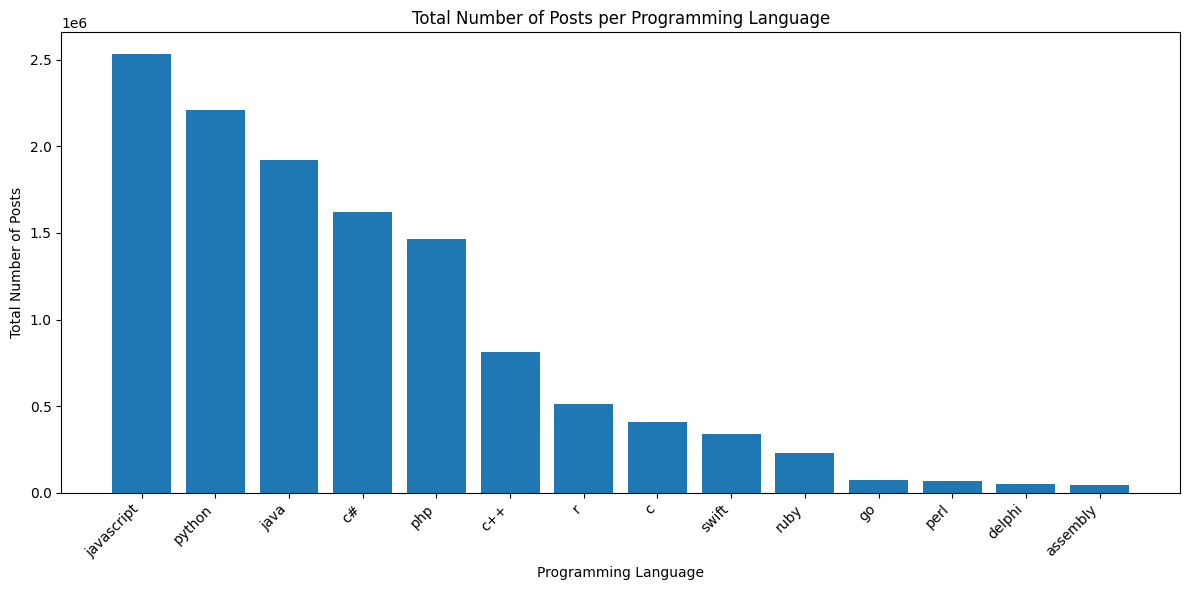

In [ ]:
total_posts_per_language = df.groupby("TAG").agg({'POSTS': 'sum'}).sort_values(by='POSTS', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Total Number of Posts per Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Total Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.bar(total_posts_per_language.index, total_posts_per_language['POSTS'])
plt.tight_layout()
plt.show()

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

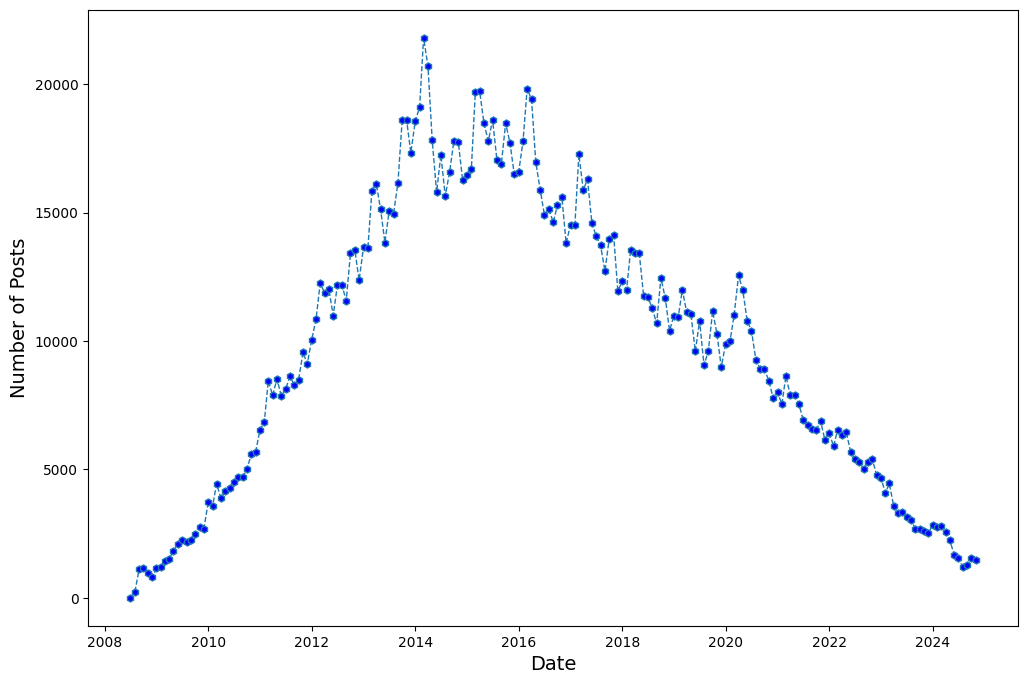

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index,reshaped_df.java,marker='h', linestyle='dashed',
     linewidth=1, markersize=5,markerfacecolor="b")

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot all the programming language on a chart.

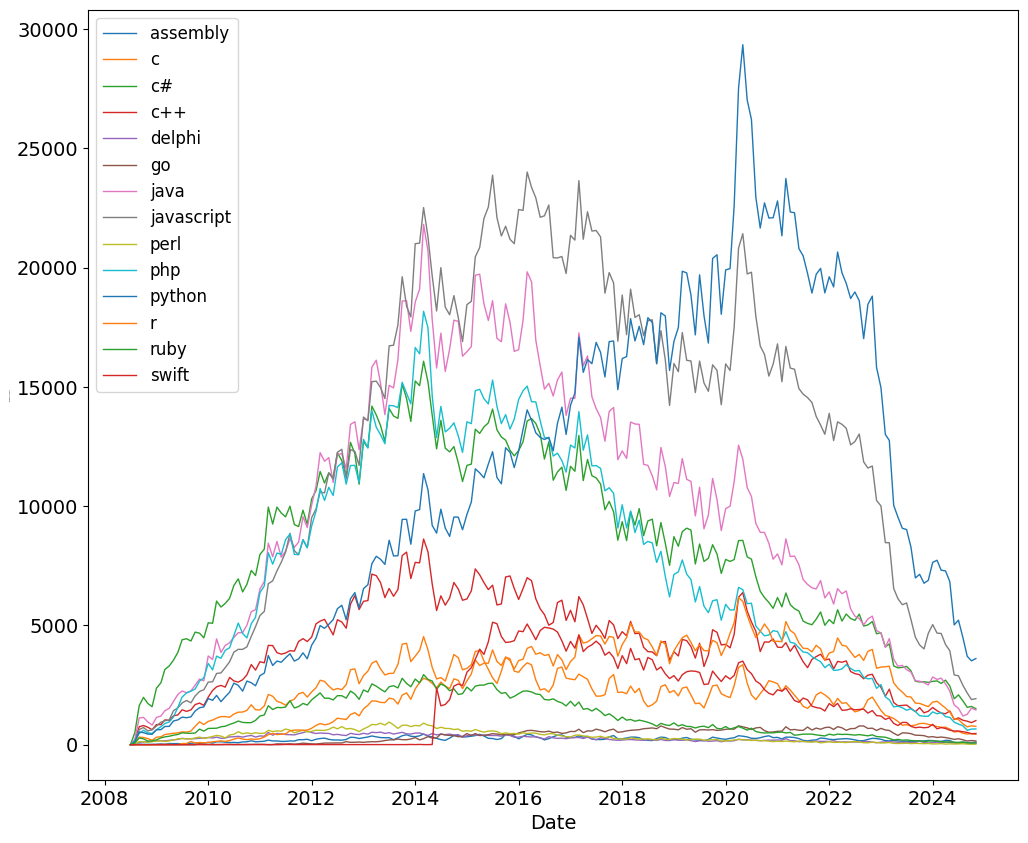

In [ ]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=1)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=1, label=reshaped_df[column].name)

plt.legend(fontsize=12)

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot top 5 most popular programming language.

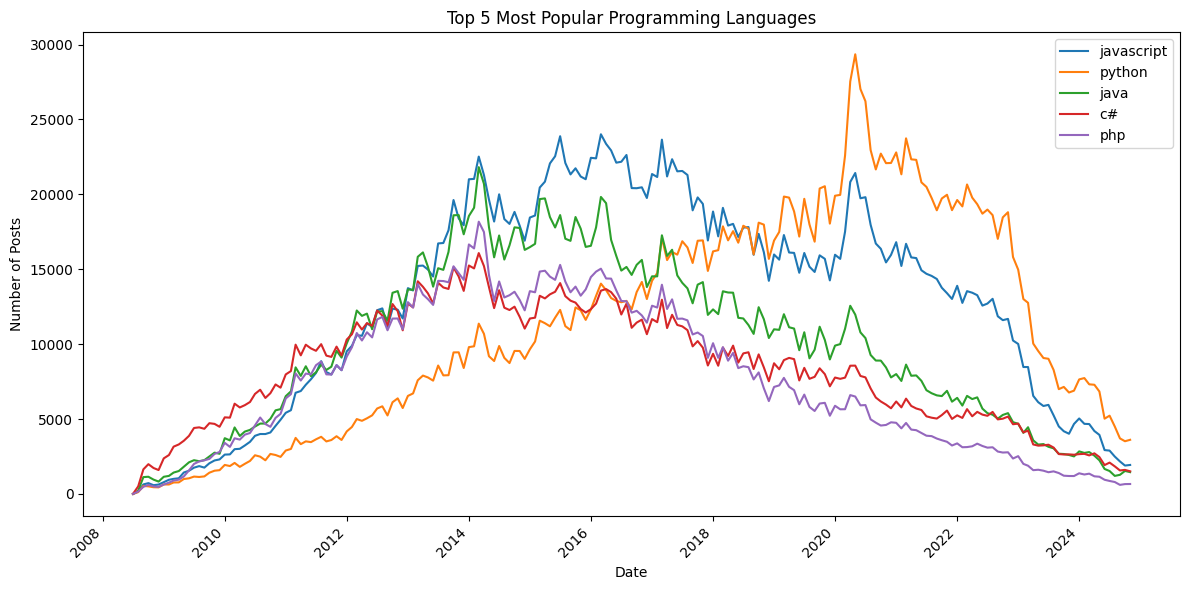

In [72]:
top_5_languages = total_posts_per_language[:5]

plt.figure(figsize=(12, 6))
plt.title('Top 5 Most Popular Programming Languages')
plt.xlabel('Date')
plt.ylabel('Number of Posts')

for language in top_5_languages.index:
    plt.plot(reshaped_df.index, reshaped_df[language], label=language)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

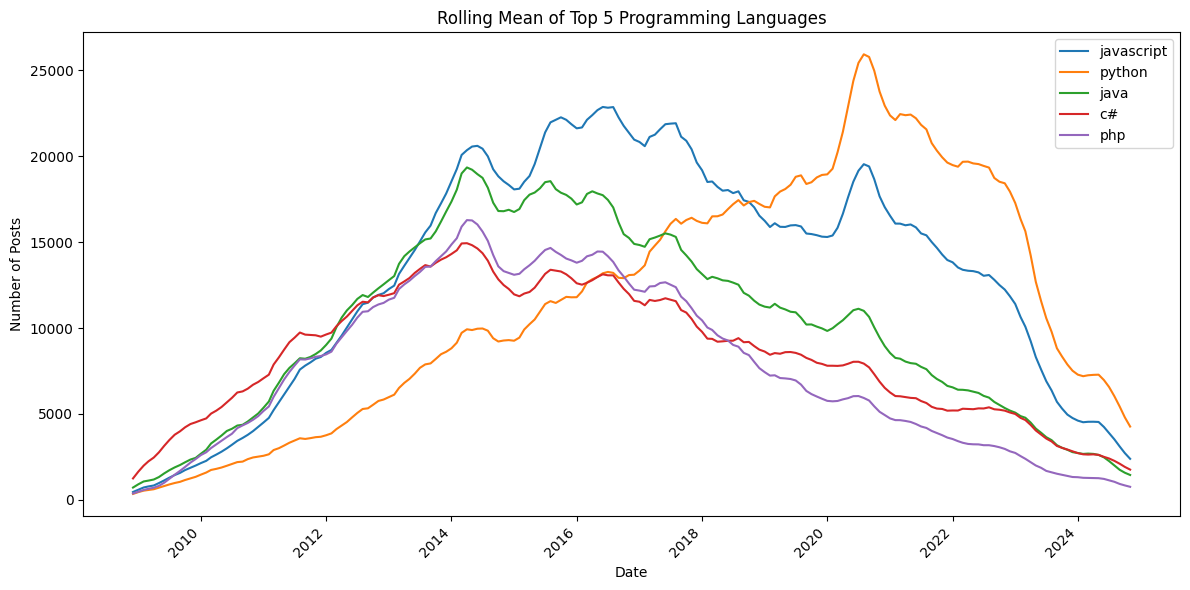

In [77]:
rolling_mean_df = reshaped_df[top_5_languages.index].rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.title('Rolling Mean of Top 5 Programming Languages')
plt.xlabel('Date')
plt.ylabel('Number of Posts')

for language in rolling_mean_df.columns:
    plt.plot(rolling_mean_df.index, rolling_mean_df[language], label=language)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()